**Objectif:**

Effectuer une analyse exploratoire des données transactionnelles pour mieux comprendre les caractéristiques des fraudes et poser les bases d’un modèle de détection automatique.


# 1- Importation des bibliothèques

Nous  importons  les bibliothèques de base pour la manipulation de données (Pandas, NumPy) et la visualisation (Matplotlib, Seaborn), outils indispensables pour toute analyse exploratoire.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 2- Chargement et appercu des donnees 

 Avant toute chose, il faut charger les données dans un environnement où il est possible de les manipuler , il egalement  essentiel de comprendre la structure générale des données : nombre de lignes, types de variables, présence de valeurs extrêmes ou de formats incorrects.

In [4]:
# Chargement des données
df = pd.read_csv("C:/Users/Hermann/Documents/MES_TRAVAUX\DETECTION DE LA FRAUDE/detection_fraude_bancaire _sfdffd/data/sfdffd.csv")  # remplace par ton vrai nom de fichier



In [5]:
# les premiere observations  ds donnees
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


**Effichage de la struture des donnees:** Cela permet de connaître la taille du dataset, le type des variables (numériques, catégoriques, etc.), et s’il y a des valeurs manquantes. C’est important pour anticiper le nettoyage et les transformations nécessaires.

In [6]:
# informations generale sur les donnees
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


# 3- Valeurs manquantes et doublons


 les données manquantes et les doublons  peuvent biaiser l’analyse ou poser problème pour la modélisation,Les modèles d'apprentissage automatique ne les les supportent pas. Il faut savoir où Il faut les identifier pour les traiter en amont.

In [15]:
# donnees manquantes
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [12]:
# donnees dupliquée

df.duplicated().sum()

0

**Statistiques descriptives:** Obtenir des informations statistiques sur les colonnes numériques : moyenne, médiane, quartiles, min/max, écart-type. Cela permet de comprendre la distribution et détecter d’éventuelles valeurs aberrantes.


# 4- Analyse des variables

## 4.1- Variables numériques

In [13]:
# statistique descriptives (variables quantitatives)

# Liste des variables considere comme quantitative
numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
df[numeric_cols].describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06
std,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05
75%,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06
max,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08


## 4.2 Variables qualitatives

 Il est important de comprendre la répartition des types de transactions (CASH-IN, PAYMENT, etc.), car cela permet d’identifier les comportements courants et de concentrer l’analyse sur les types les plus significatifs.

Par ailleurs, l’analyse de la répartition des classes cibles (fraude vs non-fraude) est essentielle pour détecter d’éventuels déséquilibres. Ce déséquilibre influence directement le choix des modèles à utiliser ainsi que les métriques d’évaluation appropriées.

In [15]:
# statistique descriptive(variables categorielle)
# Liste des variables qualitatives à analyser
qualitative_cols = ['type', 'isFraud', 'isFlaggedFraud']


for col in qualitative_cols:
    print(f"\nValeurs uniques pour {col} :")
    print(df[col].value_counts())



Valeurs uniques pour type :
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

Valeurs uniques pour isFraud :
isFraud
0    6354407
1       8213
Name: count, dtype: int64

Valeurs uniques pour isFlaggedFraud :
isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64


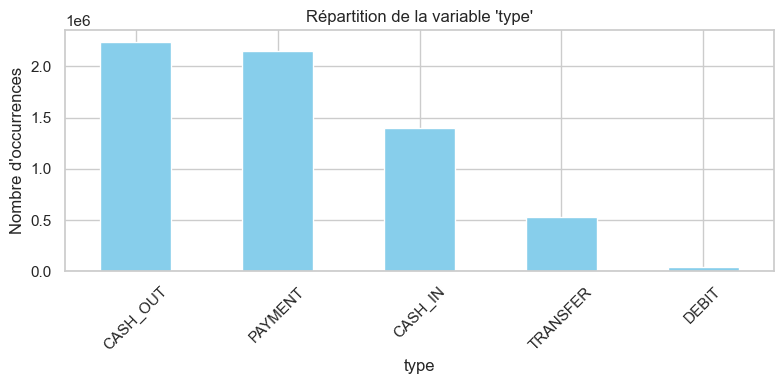

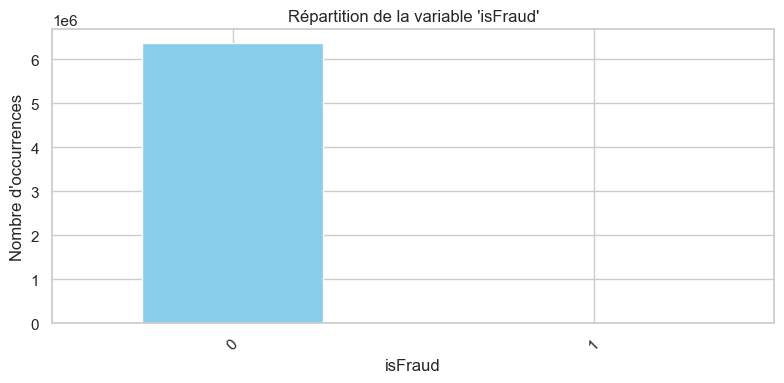

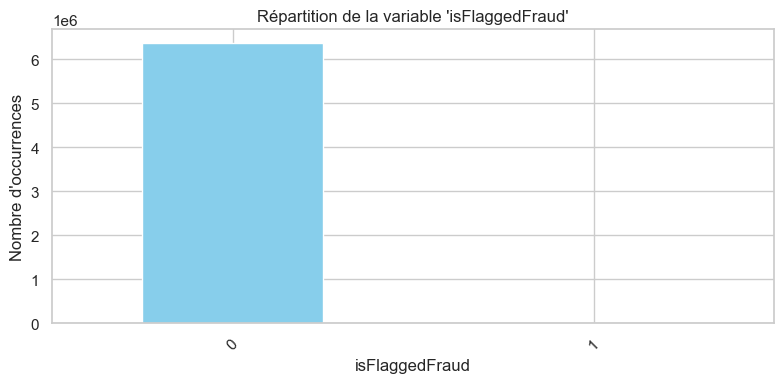

In [55]:


# Liste des variables qualitatives à analyser
qualitative_cols = ['type', 'isFraud', 'isFlaggedFraud']

# Boucle sur chaque variable pour afficher un diagramme en barres
for col in qualitative_cols:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f"Répartition de la variable '{col}'")
    plt.ylabel("Nombre d'occurrences")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()




## 4.3- Justificatif du non traitement de certaines variables dans l'EDA(Exploratory Data Analysis)

### a) step — Unité de temps (1 step = 1 heure)


 La variable temporelle (codée en heures abstraites de 1 à 744) peut être laissée de côté dans  lors de l’EDA, notamment si l’analyse ne porte pas sur des aspects temporels. En effet, elle n’est pas directement interprétable, car elle ne fait pas référence à des unités calendaires précises (comme des jours ou des semaines).

Cependant, elle devient pertinente dans le cadre d’une analyse temporelle, en particulier pour l’étude des fraudes. Elle peut alors permettre de :

Suivre l’évolution des fraudes au fil du temps (par heure, jour, ou semaine),

Identifier des pics d’activité suspects,

Déterminer s’il existe des plages horaires plus sensibles à des comportements frauduleux.

### b) nameOrig et nameDest — Identifiants des clients

On les exclut en général parceque Ce sont des identifiants anonymes → pas de signification statistique ou explicative.

Les modèles de machine learning risquent de surapprendre des motifs spécifiques à certains noms.

En EDA, ils créeraient des milliers de modalités, donc peu lisibles. cependant elle utiles 

Pour vérifier si certains clients sont récidivistes (ex. client qui envoie ou reçoit souvent des fraudes).

Pour construire des réseaux de relations (ex. qui envoie à qui).


### c) isFlaggedFraud - Transaction automatique signalé

 La variable indique si une anomalie a été détectée par le système est intéressante mais délicate à utiliser dans une démarche de modélisation.

En effet :

Elle est presque toujours à 0, sauf dans de rares cas (notamment pour des transferts supérieurs à 200 000).

Elle est fortement déséquilibrée et ne recoupe pas toujours la variable cible réelle isFraud, ce qui peut fausser l’analyse.

Elle reflète déjà une forme de détection automatique du système en place, donc l’inclure comme variable explicative pourrait introduire un biais : le modèle risquerait d’apprendre à prédire ce que le système connaît déjà.

et donc on peut choisir de mettre cette variable de côté dans un premier temps, surtout si l’objectif est de développer un modèle indépendant de l’existant, ou d’améliorer la détection.



# 5-  Analyse des relations entre les variables

### 5.1- Correlation entre les variables numeriques

In [18]:
corr = df.corr()
sns.heatmap(corr, annot=True)


ValueError: could not convert string to float: 'PAYMENT'

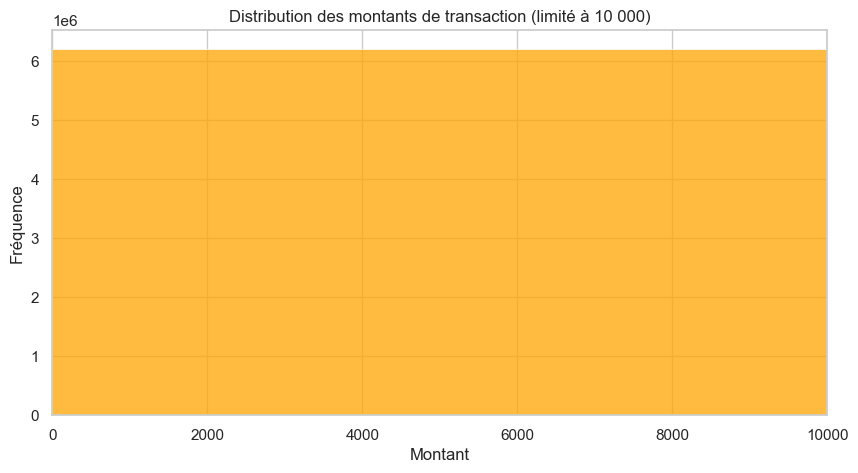

In [23]:
# Répartition des montants des transactions
plt.figure(figsize=(10,5))
sns.histplot(df['amount'], bins=100, kde=False, color='orange')
plt.xlim(0, 10000)
plt.title("Distribution des montants de transaction (limité à 10 000)")
plt.xlabel("Montant")
plt.ylabel("Fréquence")
plt.show()


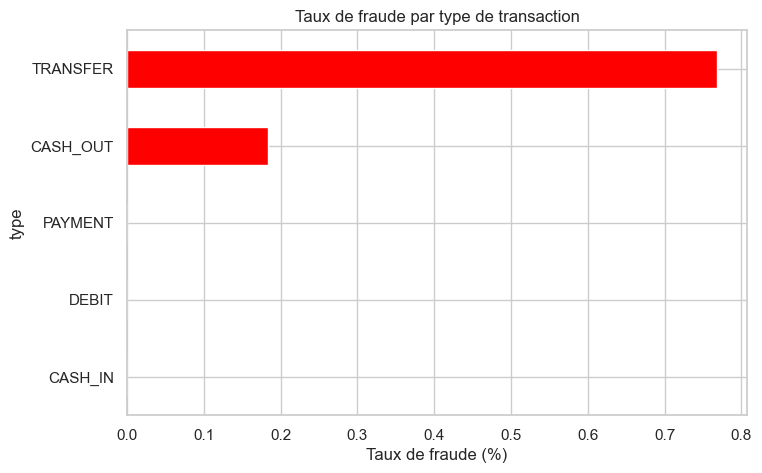

In [24]:
# Analyse de la fraude par type de transaction
fraud_by_type = df.groupby('type')['isFraud'].mean() * 100
plt.figure(figsize=(8,5))
fraud_by_type.sort_values().plot(kind='barh', color='red')
plt.title("Taux de fraude par type de transaction")
plt.xlabel("Taux de fraude (%)")
plt.show()

**relation en tre les variable**:Comparer les montants entre transactions frauduleuses et non-frauduleuses peut montrer si le montant est un facteur discriminant.


In [ ]:
sns.boxplot(x='isFraud', y='amount', data=df)


<Axes: xlabel='isFraud', ylabel='amount'>

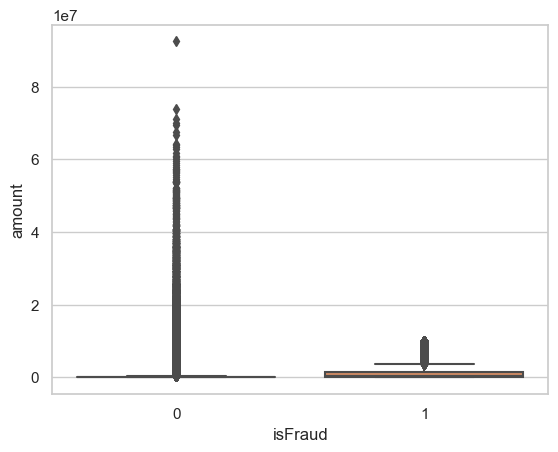

In [38]:
sns.boxplot(x='isFraud', y='amount', data=df)


In [9]:
# Proportions des classes cibles (fraude / non fraude)
df['type'].value_counts(normalize=True) * 100

type
CASH_OUT    35.166331
PAYMENT     33.814608
CASH_IN     21.992261
TRANSFER     8.375622
DEBIT        0.651178
Name: proportion, dtype: float64

In [10]:
# repartitions des fraudes
df['isFraud'].value_counts(normalize=True) * 100  # % de fraudes


isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64

In [11]:
# type d'operation frauduleuse
df[df['isFraud'] == 1]['type'].value_counts()


type
CASH_OUT    4116
TRANSFER    4097
Name: count, dtype: int64

Text(0.5, 1.0, "Montant des transactions selon qu'elles soient frauduleuses ou non")

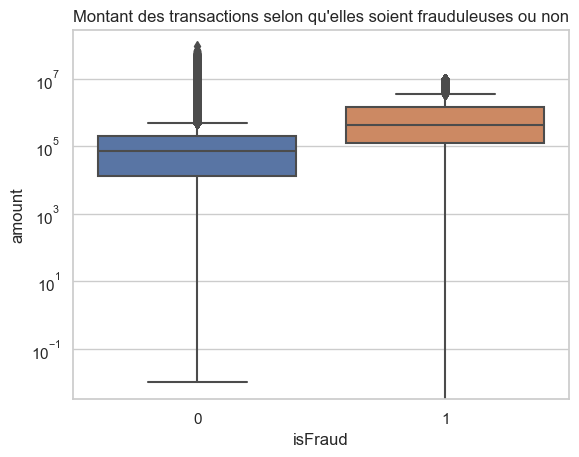

In [12]:
# visualisation  
import seaborn as sns
import matplotlib.pyplot as plt

# Répartition du montant des transactions frauduleuses vs normales
sns.boxplot(x='isFraud', y='amount', data=df)
plt.yscale('log')  # car les montants ont probablement de fortes variations
plt.title("Montant des transactions selon qu'elles soient frauduleuses ou non")


<Axes: >

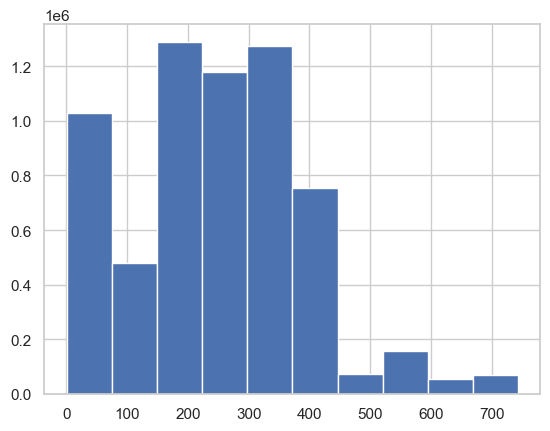

In [39]:
df['step'].hist()
